In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
transactions_data = pd.read_excel("raw dataset.xlsx",sheet_name=0)
newCus_data = pd.read_excel("raw dataset.xlsx",sheet_name=1)
demographic_data = pd.read_excel("raw dataset.xlsx",sheet_name=2)
adress_data = pd.read_excel("raw dataset.xlsx",sheet_name=3)

C:\Users\Amr\AppData\Local\Temp\ipykernel_7740\3310008311.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  newCus_data = pd.read_excel("raw dataset.xlsx",sheet_name=1)
C:\Users\Amr\AppData\Local\Temp\ipykernel_7740\3310008311.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demographic_data = pd.read_excel("raw dataset.xlsx",sheet_name=2)


In [3]:
print(transactions_data['customer_id'].isnull().sum())
print(demographic_data['customer_id'].isnull().sum())
print(adress_data['customer_id'].isnull().sum())

0
0
0


In [4]:
dataset = pd.merge(transactions_data, demographic_data, on='customer_id')
dataset = pd.merge(dataset, adress_data, on='customer_id')
dataset.drop('default',axis=1,inplace=True)
dataset

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,19854,68,130,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,Raddy,Delete,Male,32,1997-07-18,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0,58 Helena Hill,2205,New South Wales,Australia,7
19964,17966,17,2789,2017-12-06,0.0,Approved,Solex,Standard,high,medium,1024.66,614.80,35378.0,Violetta,Bucksey,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,2112,NSW,Australia,11
19965,18462,80,2789,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,42226.0,Violetta,Bucksey,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,2112,NSW,Australia,11
19966,17981,69,3446,2017-12-26,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,Gard,Tidy,Male,8,1967-01-30,Structural Engineer,Manufacturing,Mass Customer,N,No,14.0,8 Becker Drive,4868,QLD,Australia,4


In [5]:
dataset.memory_usage(deep=True)

Index                                   159744
transaction_id                          159744
product_id                              159744
customer_id                             159744
transaction_date                        159744
online_order                            159744
order_status                           1298098
brand                                  1337012
product_line                           1274399
product_class                          1237038
product_size                           1245135
list_price                              159744
standard_cost                           159744
product_first_sold_date                 159744
first_name                             1257190
last_name                              1257790
gender                                 1236597
past_3_years_bike_related_purchases     159744
DOB                                     159744
job_title                              1399340
job_industry_category                  1243058
wealth_segmen

In [6]:
dataset.set_index("customer_id", inplace = True)

In [7]:
dataset.head(5)

,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2950,1,2,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2950,11065,1,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2950,18923,62,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3120,2,3,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
3120,6862,4,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5


Finding Missing Data

In [8]:
print(dataset.isnull().sum().sum())
print(dataset.isnull().sum())

8664
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            359
order_status                              0
brand                                   195
product_line                            195
product_class                           195
product_size                            195
list_price                                0
standard_cost                           195
product_first_sold_date                 195
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2379
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                     

Fill null values

In [9]:
for col in dataset.columns:
    if dataset[col].isnull().sum() > 0:
        if dataset[col].dtype == 'int64' or dataset[col].dtype == 'float64':
            median = dataset[col].median()
            dataset[col].fillna(median, inplace=True)
        else:
            mode = dataset[col].mode()[0]
            dataset[col].fillna(mode, inplace=True)

In [10]:
print(dataset.isnull().sum().sum())
print(dataset.isnull().sum())

0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode      

In [11]:
dataset.drop_duplicates(subset="transaction_id",keep=False, inplace=True)

In [12]:
dataset

,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2950,1,2,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2950,11065,1,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2950,18923,62,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3120,2,3,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
3120,6862,4,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,19854,68,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,Raddy,Delete,Male,32,1997-07-18,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0,58 Helena Hill,2205,New South Wales,Australia,7
2789,17966,17,2017-12-06,0.0,Approved,Solex,Standard,high,medium,1024.66,614.80,35378.0,Violetta,Bucksey,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,2112,NSW,Australia,11
2789,18462,80,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,42226.0,Violetta,Bucksey,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,2112,NSW,Australia,11


Cleaning Data

In [13]:
dataset['gender'].value_counts()

Female    9979
Male      9510
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [14]:
dataset['gender'].replace(['F','Femal','M'],['Female','Female','Male'],inplace=True)                        
dataset['state'].replace('New South Wales','NSW',inplace=True)                        
dataset['gender'].replace('U',dataset['gender'].mode()[0],inplace=True)

In [15]:
dataset['gender'].value_counts()

Female    10452
Male       9516
Name: gender, dtype: int64

Optimize the dataset by categorizing and dropping useless columns

In [16]:
dataset.dtypes

transaction_id                                  int64
product_id                                      int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category       

In [17]:
dataset.memory_usage(deep=True)

Index                                   159744
transaction_id                          159744
product_id                              159744
transaction_date                        159744
online_order                            159744
order_status                           1298098
brand                                  1342862
product_line                           1280834
product_class                          1243083
product_size                           1251180
list_price                              159744
standard_cost                           159744
product_first_sold_date                 159744
first_name                             1257190
last_name                              1278334
gender                                 1238952
past_3_years_bike_related_purchases     159744
DOB                                     159744
job_title                              1489742
job_industry_category                  1365494
wealth_segment                         1422273
deceased_indi

In [18]:
dataset.drop(['transaction_id','first_name','last_name','postcode'],axis=1,inplace=True)

In [19]:
for col in dataset.columns:
    num_unique = dataset[col].nunique()
    if num_unique < 500:
        dataset[col] = dataset[col].astype('category')

In [20]:
dataset.dtypes

product_id                                   category
transaction_date                             category
online_order                                 category
order_status                                 category
brand                                        category
product_line                                 category
product_class                                category
product_size                                 category
list_price                                   category
standard_cost                                category
product_first_sold_date                      category
gender                                       category
past_3_years_bike_related_purchases          category
DOB                                    datetime64[ns]
job_title                                    category
job_industry_category                        category
wealth_segment                               category
deceased_indicator                           category
owns_car                    

In [21]:
dataset.memory_usage(deep=True)

Index                                   159744
product_id                               24944
transaction_date                         51144
online_order                             20092
order_status                             20207
brand                                    20546
product_line                             20395
product_class                            20260
product_size                             20263
list_price                               50584
standard_cost                            24936
product_first_sold_date                  24936
gender                                   20200
past_3_years_bike_related_purchases      24936
DOB                                     159744
job_title                                58892
job_industry_category                    20876
wealth_segment                           20291
deceased_indicator                       20192
owns_car                                 20195
tenure                                   20700
address      

In [22]:
dataset.memory_usage(deep=True)

Index                                   159744
product_id                               24944
transaction_date                         51144
online_order                             20092
order_status                             20207
brand                                    20546
product_line                             20395
product_class                            20260
product_size                             20263
list_price                               50584
standard_cost                            24936
product_first_sold_date                  24936
gender                                   20200
past_3_years_bike_related_purchases      24936
DOB                                     159744
job_title                                58892
job_industry_category                    20876
wealth_segment                           20291
deceased_indicator                       20192
owns_car                                 20195
tenure                                   20700
address      

Number of unique customers

In [23]:
dataset.index.nunique()

3489

Customer Segmentation

In [24]:
dataset

,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
2950,2,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,VIC,Australia,6
2950,1,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,VIC,Australia,6
2950,62,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,VIC,Australia,6
3120,3,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,NSW,Australia,5
3120,4,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,68,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,Male,32,1997-07-18,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0,58 Helena Hill,NSW,Australia,7
2789,17,2017-12-06,0.0,Approved,Solex,Standard,high,medium,1024.66,614.80,35378.0,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,NSW,Australia,11
2789,80,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,42226.0,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,NSW,Australia,11


Visualizations

In [25]:
def barplot(x,data=dataset):
    fig = plt.Figure(figsize=(12,6))
    fig = px.bar(x=dataset[x].value_counts().index,y=dataset[x].value_counts(),color=dataset[x].value_counts().index,height=600)
    fig.show()

In [26]:
barplot('state')

In [27]:
barplot('gender')

In [28]:
barplot('product_size')

In [29]:
barplot('product_class')

In [30]:
barplot("wealth_segment")

In [31]:
def find_relation_visual(x,y,height=600,func='count'):
    global dataset
    data = dataset.loc[:, [x,y]]
    n1 = data[x].value_counts().index
    n2 = data[y].value_counts().index
    
    seg_lst = []
    seg_ret = []
    
    for i in n1:
        if func == 'count':
            for j in n2:
                seg_lst.append(str(i + " "+j))
                seg_ret.append(len(data[(data[x] == i) & (data[y] == j)]))
        elif func == 'sum':
            sumval = dataset[dataset[x] == i]
            seg_lst.append(str(i))
            seg_ret.append(sumval[y].astype(int).sum())
    lst = sorted(list(zip(seg_lst,seg_ret)),key = lambda x: x[1],reverse=True)
            
    
    fig = plt.Figure(figsize=(int(len(seg_ret)*3),height))
    fig = px.bar(x=[str(x[0]) for x in lst],y=[x[1] for x in lst],height=height)
    fig.show()
    print(lst)

In [32]:
find_relation_visual("gender","product_class")

[('Female medium', 7352), ('Male medium', 6645), ('Female high', 1565), ('Female low', 1535), ('Male high', 1447), ('Male low', 1424)]


In [33]:
find_relation_visual("gender","product_class")

[('Female medium', 7352), ('Male medium', 6645), ('Female high', 1565), ('Female low', 1535), ('Male high', 1447), ('Male low', 1424)]


In [34]:
find_relation_visual('gender','product_line')

[('Female Standard', 7515), ('Male Standard', 6836), ('Female Road', 2081), ('Male Road', 1882), ('Female Touring', 631), ('Male Touring', 603), ('Female Mountain', 225), ('Male Mountain', 195)]


In [35]:
find_relation_visual("gender",'wealth_segment')

[('Female Mass Customer', 5373), ('Male Mass Customer', 4656), ('Female High Net Worth', 2624), ('Male High Net Worth', 2457), ('Female Affluent Customer', 2455), ('Male Affluent Customer', 2403)]


In [36]:
find_relation_visual('gender',"standard_cost",func='sum')

[('Female', 5785648), ('Male', 5297969)]


Machine Learning Part

Dividing Customers into clusters

In [37]:
dataset

,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,,,,,,,,
2950,2,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,VIC,Australia,6
2950,1,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,VIC,Australia,6
2950,62,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,VIC,Australia,6
3120,3,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,NSW,Australia,5
3120,4,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,68,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,Male,32,1997-07-18,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0,58 Helena Hill,NSW,Australia,7
2789,17,2017-12-06,0.0,Approved,Solex,Standard,high,medium,1024.66,614.80,35378.0,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,NSW,Australia,11
2789,80,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,42226.0,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,NSW,Australia,11


In [38]:
ml_dataset = dataset.reset_index().drop(['transaction_date','order_status','standard_cost','product_first_sold_date','address','country','deceased_indicator','customer_id','DOB'],axis=1)
ml_dataset['online_order']=ml_dataset['online_order'].astype(int)
ml_dataset['product_id']=ml_dataset['product_id'].astype(int)

In [39]:
ml_dataset

,product_id,online_order,brand,product_line,product_class,product_size,list_price,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,2,0,Solex,Standard,medium,medium,71.49,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,VIC,6
1,1,0,Giant Bicycles,Standard,medium,medium,1403.50,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,VIC,6
2,62,0,Solex,Standard,medium,medium,478.16,Male,19,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,VIC,6
3,3,1,Trek Bicycles,Standard,medium,large,2091.47,Female,89,Clinical Specialist,Health,Mass Customer,Yes,10.0,NSW,5
4,4,0,Giant Bicycles,Standard,high,medium,1129.13,Female,89,Clinical Specialist,Health,Mass Customer,Yes,10.0,NSW,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,68,1,OHM Cycles,Standard,medium,medium,1636.90,Male,32,Chemical Engineer,Manufacturing,Mass Customer,No,1.0,NSW,7
19964,17,0,Solex,Standard,high,medium,1024.66,Female,66,Senior Editor,Financial Services,Affluent Customer,Yes,7.0,NSW,11
19965,80,0,OHM Cycles,Touring,low,medium,1073.07,Female,66,Senior Editor,Financial Services,Affluent Customer,Yes,7.0,NSW,11
19966,69,1,Giant Bicycles,Road,medium,medium,792.90,Male,8,Structural Engineer,Manufacturing,Mass Customer,No,14.0,QLD,4


In [40]:
for i in ml_dataset.columns:
    print(i,ml_dataset[i].nunique())

product_id 101
online_order 2
brand 6
product_line 4
product_class 3
product_size 3
list_price 294
gender 2
past_3_years_bike_related_purchases 100
job_title 195
job_industry_category 9
wealth_segment 3
owns_car 2
tenure 22
state 4
property_valuation 12


In [41]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
oe_cat = oe.fit_transform(ml_dataset[['owns_car']]).toarray()
feature_names = oe.get_feature_names_out(['owns_car'])
oe_cat_df = pd.DataFrame(oe_cat, columns=feature_names)
ml_dataset = pd.concat([ml_dataset, oe_cat_df], axis=1)
ml_dataset = ml_dataset.drop(['owns_car'], axis=1)

In [42]:
oe_cat = oe.fit_transform(ml_dataset[['state']]).toarray()
feature_names = oe.get_feature_names_out(['state'])
oe_cat_df = pd.DataFrame(oe_cat, columns=feature_names)
ml_dataset = pd.concat([ml_dataset, oe_cat_df], axis=1)
ml_dataset = ml_dataset.drop(['state'], axis=1)

In [43]:
oe_cat = oe.fit_transform(ml_dataset[['gender']]).toarray()
feature_names = oe.get_feature_names_out(['gender'])
oe_cat_df = pd.DataFrame(oe_cat, columns=feature_names)
ml_dataset = pd.concat([ml_dataset, oe_cat_df], axis=1)
ml_dataset = ml_dataset.drop(['gender'], axis=1)

In [44]:
oe_cat = oe.fit_transform(ml_dataset[['product_size']]).toarray()
feature_names = oe.get_feature_names_out(['product_size'])
oe_cat_df = pd.DataFrame(oe_cat, columns=feature_names)
ml_dataset = pd.concat([ml_dataset, oe_cat_df], axis=1)
ml_dataset = ml_dataset.drop(['product_size'], axis=1)

In [45]:
oe_cat = oe.fit_transform(ml_dataset[['product_class']]).toarray()
feature_names = oe.get_feature_names_out(['product_class'])
oe_cat_df = pd.DataFrame(oe_cat, columns=feature_names)
ml_dataset = pd.concat([ml_dataset, oe_cat_df], axis=1)
ml_dataset = ml_dataset.drop(['product_class'], axis=1)

In [46]:
oe_cat = oe.fit_transform(ml_dataset[['wealth_segment']]).toarray()
feature_names = oe.get_feature_names_out(['wealth_segment'])
oe_cat_df = pd.DataFrame(oe_cat, columns=feature_names)
ml_dataset = pd.concat([ml_dataset, oe_cat_df], axis=1)
ml_dataset = ml_dataset.drop(['wealth_segment'], axis=1)

In [47]:
oe_cat = oe.fit_transform(ml_dataset[['brand']]).toarray()
feature_names = oe.get_feature_names_out(['brand'])
oe_cat_df = pd.DataFrame(oe_cat, columns=feature_names)
ml_dataset = pd.concat([ml_dataset, oe_cat_df], axis=1)
ml_dataset = ml_dataset.drop(['brand'], axis=1)

In [48]:
oe_cat = oe.fit_transform(ml_dataset[['product_line']]).toarray()
feature_names = oe.get_feature_names_out(['product_line'])
oe_cat_df = pd.DataFrame(oe_cat, columns=feature_names)
ml_dataset = pd.concat([ml_dataset, oe_cat_df], axis=1)
ml_dataset = ml_dataset.drop(['product_line'], axis=1)

In [49]:
oe_cat = oe.fit_transform(ml_dataset[['job_industry_category']]).toarray()
feature_names = oe.get_feature_names_out(['job_industry_category'])
oe_cat_df = pd.DataFrame(oe_cat, columns=feature_names)
ml_dataset = pd.concat([ml_dataset, oe_cat_df], axis=1)
ml_dataset = ml_dataset.drop(['job_industry_category'], axis=1)

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(ml_dataset['job_title'])
numerical_data = le.transform(ml_dataset['job_title'])
numerical_data

array([155, 155, 155, ..., 149, 174, 174])

In [51]:
ml_dataset.drop('job_title',axis=1)
ml_dataset['job_title'] = numerical_data.tolist()
ml_dataset

,product_id,online_order,list_price,past_3_years_bike_related_purchases,job_title,tenure,property_valuation,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC,state_Victoria,gender_Female,gender_Male,product_size_large,product_size_medium,product_size_small,product_class_high,product_class_low,product_class_medium,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications
0,2,0,71.49,19,155,10.0,6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1403.50,19,155,10.0,6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,0,478.16,19,155,10.0,6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2091.47,89,42,10.0,5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0,1129.13,89,42,10.0,5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,68,1,1636.90,32,39,1.0,7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19964,17,0,1024.66,66,149,7.0,11,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19965,80,0,1073.07,66,149,7.0,11,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19966,69,1,792.90,8,174,14.0,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(ml_dataset[['past_3_years_bike_related_purchases']])
ml_dataset['scaled_related_purchases'] = scaled
ml_dataset.drop('past_3_years_bike_related_purchases',axis=1,inplace=True)

In [53]:
scaled = scaler.fit_transform(ml_dataset[['list_price']])
ml_dataset['scaled_list_price'] = scaled
ml_dataset.drop('list_price',axis=1,inplace=True)

In [54]:
scaled = scaler.fit_transform(ml_dataset[['tenure']])
ml_dataset['scaled_tenure'] = scaled
ml_dataset.drop('tenure',axis=1,inplace=True)

In [55]:
scaled = scaler.fit_transform(ml_dataset[['property_valuation']])
ml_dataset['scaled_property_valuation'] = scaled
ml_dataset.drop('property_valuation',axis=1,inplace=True)

In [56]:
ml_dataset

,product_id,online_order,job_title,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC,state_Victoria,gender_Female,gender_Male,product_size_large,product_size_medium,product_size_small,product_class_high,product_class_low,product_class_medium,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,scaled_related_purchases,scaled_list_price,scaled_tenure,scaled_property_valuation
0,2,0,155,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.040082,-1.778007,-0.122805,-0.536825
1,1,0,155,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.040082,0.507379,-0.122805,-0.536825
2,62,0,155,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.040082,-1.080266,-0.122805,-0.536825
3,3,1,42,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.406560,1.687759,-0.122805,-0.890843
4,4,0,42,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.406560,0.036631,-0.122805,-0.890843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,68,1,39,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.585706,0.907834,-1.726811,-0.182807
19964,17,0,149,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.602663,-0.142613,-0.657473,1.233267
19965,80,0,149,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.602663,-0.059553,-0.657473,1.233267
19966,69,1,174,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.424554,-0.540253,0.590087,-1.244862


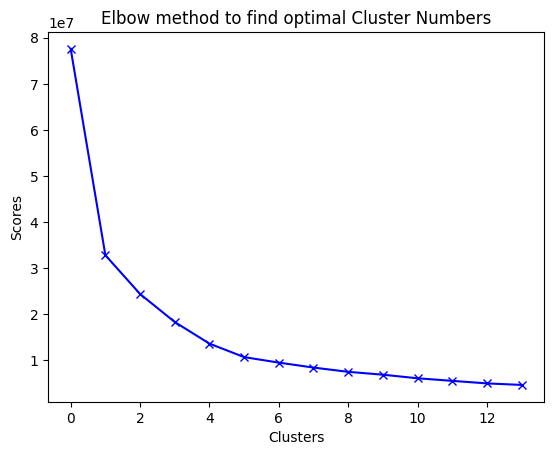

In [57]:
from sklearn.cluster import KMeans

scores =  []
for i in range (1,15):
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(ml_dataset)
    scores.append(Kmeans.inertia_)
    
    
    
plt.plot(scores,'bx-')
plt.title('Elbow method to find optimal Cluster Numbers')
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.show()

In [58]:
Kmeans = KMeans(4)
Kmeans.fit(ml_dataset)
labels = Kmeans.labels_

In [59]:
Kmeans.cluster_centers_.shape

(4, 43)

In [60]:
cluster_centers = pd.DataFrame(data=Kmeans.cluster_centers_,columns=[ml_dataset.columns])
cluster_centers

,product_id,online_order,job_title,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC,state_Victoria,gender_Female,gender_Male,product_size_large,product_size_medium,product_size_small,product_class_high,product_class_low,product_class_medium,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,scaled_related_purchases,scaled_list_price,scaled_tenure,scaled_property_valuation
0,73.204665,0.512463,57.600960,0.509261,0.490739,0.520695,0.214727,0.238509,0.026069,0.507661,0.492339,0.248342,0.616510,0.135147,0.128745,0.144523,0.726732,0.270524,0.211297,0.518180,0.151155,0.169220,0.177224,0.182026,0.105648,0.214727,0.004802,0.197347,0.699520,0.098331,0.031100,0.048708,0.205580,0.145895,0.053739,0.360393,0.065401,0.074777,0.014407,0.039507,0.078949,-0.053113,0.011648
1,71.992668,0.501222,151.328633,0.510434,0.489566,0.537695,0.218838,0.221658,0.021809,0.538823,0.461177,0.245723,0.618161,0.136116,0.120699,0.147020,0.732281,0.247415,0.206054,0.546531,0.156420,0.160368,0.184245,0.172589,0.111487,0.214890,0.005828,0.204926,0.692799,0.096447,0.025381,0.019553,0.187441,0.156044,0.056026,0.367362,0.066742,0.098139,0.023313,-0.033255,0.066334,0.049688,-0.021205
2,18.928358,0.508789,140.114594,0.492703,0.507297,0.552405,0.212106,0.213599,0.021891,0.525871,0.474129,0.156716,0.695522,0.147761,0.181592,0.146103,0.672305,0.224046,0.304643,0.471310,0.180929,0.130017,0.120232,0.265837,0.186567,0.116418,0.035489,0.187396,0.747595,0.029519,0.028358,0.031012,0.180431,0.166833,0.046932,0.360531,0.064677,0.100332,0.020896,-0.016103,-0.062317,0.000444,0.004359
3,20.884833,0.518606,42.642958,0.474093,0.525907,0.522138,0.207254,0.242817,0.027791,0.516957,0.483043,0.148846,0.703250,0.147904,0.167687,0.156382,0.675930,0.237400,0.288271,0.474329,0.170513,0.124352,0.131653,0.265191,0.189119,0.119171,0.036269,0.207254,0.729863,0.026613,0.032030,0.045690,0.211022,0.147197,0.061234,0.360810,0.060763,0.071597,0.009656,0.023839,-0.075908,-0.008173,0.008377


In [61]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=Kmeans.cluster_centers_,columns=[ml_dataset.columns])
cluster_centers

,product_id,online_order,job_title,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC,state_Victoria,gender_Female,gender_Male,product_size_large,product_size_medium,product_size_small,product_class_high,product_class_low,product_class_medium,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,scaled_related_purchases,scaled_list_price,scaled_tenure,scaled_property_valuation
0,73.204665,0.512463,57.600960,0.509261,0.490739,0.520695,0.214727,0.238509,0.026069,0.507661,0.492339,0.248342,0.616510,0.135147,0.128745,0.144523,0.726732,0.270524,0.211297,0.518180,0.151155,0.169220,0.177224,0.182026,0.105648,0.214727,0.004802,0.197347,0.699520,0.098331,0.031100,0.048708,0.205580,0.145895,0.053739,0.360393,0.065401,0.074777,0.014407,0.039507,0.078949,-0.053113,0.011648
1,71.992668,0.501222,151.328633,0.510434,0.489566,0.537695,0.218838,0.221658,0.021809,0.538823,0.461177,0.245723,0.618161,0.136116,0.120699,0.147020,0.732281,0.247415,0.206054,0.546531,0.156420,0.160368,0.184245,0.172589,0.111487,0.214890,0.005828,0.204926,0.692799,0.096447,0.025381,0.019553,0.187441,0.156044,0.056026,0.367362,0.066742,0.098139,0.023313,-0.033255,0.066334,0.049688,-0.021205
2,18.928358,0.508789,140.114594,0.492703,0.507297,0.552405,0.212106,0.213599,0.021891,0.525871,0.474129,0.156716,0.695522,0.147761,0.181592,0.146103,0.672305,0.224046,0.304643,0.471310,0.180929,0.130017,0.120232,0.265837,0.186567,0.116418,0.035489,0.187396,0.747595,0.029519,0.028358,0.031012,0.180431,0.166833,0.046932,0.360531,0.064677,0.100332,0.020896,-0.016103,-0.062317,0.000444,0.004359
3,20.884833,0.518606,42.642958,0.474093,0.525907,0.522138,0.207254,0.242817,0.027791,0.516957,0.483043,0.148846,0.703250,0.147904,0.167687,0.156382,0.675930,0.237400,0.288271,0.474329,0.170513,0.124352,0.131653,0.265191,0.189119,0.119171,0.036269,0.207254,0.729863,0.026613,0.032030,0.045690,0.211022,0.147197,0.061234,0.360810,0.060763,0.071597,0.009656,0.023839,-0.075908,-0.008173,0.008377


In [62]:
labels.shape

(19968,)

In [63]:
pred_kMeans = Kmeans.fit_predict(ml_dataset)
pred_kMeans

array([3, 3, 0, ..., 0, 0, 0])

In [64]:
pred_kMeans.shape

(19968,)

In [65]:
ml_dataset['Cluster'] = labels

Identyfying Clusters Behaviour

In [66]:
ml_dataset['Cluster'].value_counts()

2    6029
1    5320
0    4373
3    4246
Name: Cluster, dtype: int64

In [67]:
ml_dataset

,product_id,online_order,job_title,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC,state_Victoria,gender_Female,gender_Male,product_size_large,product_size_medium,product_size_small,product_class_high,product_class_low,product_class_medium,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,brand_Giant Bicycles,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,brand_WeareA2B,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,scaled_related_purchases,scaled_list_price,scaled_tenure,scaled_property_valuation,Cluster
0,2,0,155,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.040082,-1.778007,-0.122805,-0.536825,2
1,1,0,155,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.040082,0.507379,-0.122805,-0.536825,2
2,62,0,155,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.040082,-1.080266,-0.122805,-0.536825,1
3,3,1,42,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.406560,1.687759,-0.122805,-0.890843,3
4,4,0,42,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.406560,0.036631,-0.122805,-0.890843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,68,1,39,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.585706,0.907834,-1.726811,-0.182807,0
19964,17,0,149,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.602663,-0.142613,-0.657473,1.233267,2
19965,80,0,149,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.602663,-0.059553,-0.657473,1.233267,1
19966,69,1,174,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.424554,-0.540253,0.590087,-1.244862,1


In [68]:
dataset['cluster'] = labels
dataset

,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,state,country,property_valuation,cluster
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,
2950,2,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,VIC,Australia,6,2
2950,1,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,VIC,Australia,6,2
2950,62,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,VIC,Australia,6,1
3120,3,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,NSW,Australia,5,3
3120,4,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,NSW,Australia,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,68,2017-02-02,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,Male,32,1997-07-18,Chemical Engineer,Manufacturing,Mass Customer,N,No,1.0,58 Helena Hill,NSW,Australia,7,0
2789,17,2017-12-06,0.0,Approved,Solex,Standard,high,medium,1024.66,614.80,35378.0,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,NSW,Australia,11,2
2789,80,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,42226.0,Female,66,1992-11-30,Senior Editor,Financial Services,Affluent Customer,N,Yes,7.0,724 West Park,NSW,Australia,11,1


In [69]:
for i in ml_dataset['Cluster'].value_counts().index:
    print('Cluster: ',i)
    mask = dataset['cluster'] == i
    print(dataset[mask]['gender'].value_counts())
    print(dataset[mask]['online_order'].value_counts())
    print(dataset[mask]['brand'].value_counts())
    print(dataset[mask]['product_line'].value_counts())
    print(dataset[mask]['product_class'].value_counts())
    print(dataset[mask]['product_size'].value_counts())
    print(dataset[mask]['wealth_segment'].value_counts())
    print(dataset[mask]['state'].value_counts())
    print(dataset[mask]['list_price'].astype(int).sum())

Cluster:  2
Female    3170
Male      2859
Name: gender, dtype: int64
1.0    3067
0.0    2962
Name: online_order, dtype: int64
Solex             1603
Trek Bicycles     1124
Giant Bicycles    1091
Norco Bicycles     784
OHM Cycles         725
WeareA2B           702
Name: brand, dtype: int64
Standard    4508
Road        1129
Mountain     214
Touring      178
Name: product_line, dtype: int64
medium    4053
high      1095
low        881
Name: product_class, dtype: int64
medium    4193
large      945
small      891
Name: product_size, dtype: int64
Mass Customer        2841
High Net Worth       1837
Affluent Customer    1351
Name: wealth_segment, dtype: int64
NSW         3330
VIC         1288
QLD         1279
Victoria     132
Name: state, dtype: int64
6457228
Cluster:  1
Female    2867
Male      2453
Name: gender, dtype: int64
1.0    2667
0.0    2653
Name: online_order, dtype: int64
WeareA2B          1143
OHM Cycles         980
Solex              918
Norco Bicycles     853
Giant Bicycles     

In [70]:
max(ml_dataset['Cluster'].value_counts().index)

3

In [71]:
lst = ['online_order','brand','product_class','gender','wealth_segment','state']
for i in range(max(dataset['cluster'].value_counts().index)+1):
    dat = dataset[dataset['cluster'] == i]
    for j in lst:
        barplot(j,data=dat)